In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dataset = pd.read_csv("House Pricing.csv")
num_nan_rows = dataset.isnull().sum(axis=1).astype(bool).sum()
total_rows = dataset.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

Number of records in total: 545
Number of records that has NaN values: 0


In [60]:
print(dataset.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000   7420         4          2        3      yes        no       no  \
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [61]:
print(dataset.describe())

              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [62]:
dataset.shape

(545, 13)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [64]:
dataset.head()
dataset.columns

for col in dataset:
    print("Unique values in colum '{}' are: ".format(col))
    print(dataset[col].unique())

Unique values in colum 'price' are: 
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  495

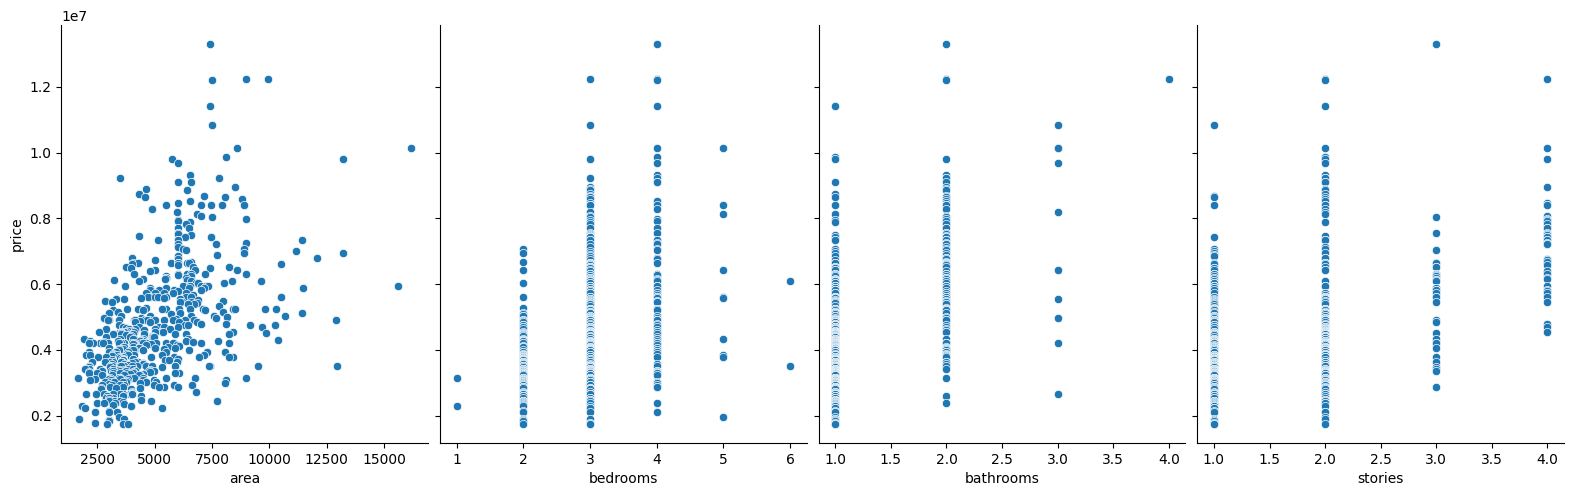

In [65]:
sns.pairplot(dataset, x_vars=['area', 'bedrooms', 'bathrooms', 'stories'], y_vars='price', height=5, aspect=0.8)
plt.show()

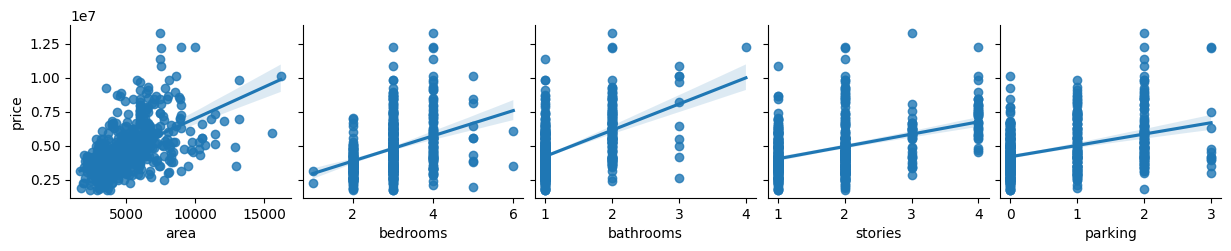

In [66]:
sns.pairplot(dataset, x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], y_vars='price', kind='reg')
plt.show()

In [67]:
dataset.dropna(inplace=True)

In [68]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [69]:
dataset = pd.get_dummies(dataset, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numOfCols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataset[numOfCols] = scaler.fit_transform(dataset[numOfCols])

In [71]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['price'], axis = 1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
X = dataset.drop(['price'], axis=1)
y = dataset['price']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
reg = LinearRegression()

In [76]:
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
y_prediction = reg.predict(X_test)

In [78]:
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediction)

In [79]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared Score: ", r2)

Mean Squared Error:  1523019469501.2913
Root Mean Squared Error:  1234106.7496376848
R-squared Score:  0.6463350878895877


In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [81]:
model = Ridge()

In [84]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'max_iter': [None, 10, 100, 1000, 10000],
              'tol': [0.0001, 0.001, 0.01, 0.1, 1]}

In [85]:
gridSearch = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [None, 10, 100, 1000, 10000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [86]:
best_model = gridSearch.best_estimator_

In [87]:
print("Best hyperparameters: ", gridSearch.best_params_)

Best hyperparameters:  {'alpha': 10, 'max_iter': None, 'solver': 'saga', 'tol': 0.1}


In [88]:
y_prediction = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediction)

In [89]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MSE:  1589917769830.64
RMSE:  1260919.414487159
R-squared:  0.6308004332248891


In [90]:
y_test_pred = reg.predict(X_test)

In [ ]:
print('Initial model R^2 score:', lin_reg_initial.score(X_test_initial, y_test_initial))
print('Final model R^2 score:', lin_reg.score(X_test, y_test))